In [6]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import data, wb
import matplotlib.pyplot as plt
from patsy import dmatrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
# from time import time
# from datetime import datetime as dt
plt.rc('font', family='SimHei', size=14) # 中文显示必须
%matplotlib inline
pd.set_option('display.max_colwidth', 200)

# 从yahoo获取标准普尔500的股票数据
# start_date = pd.to_datetime('2010-01-01')
# stop_date = pd.to_datetime('2017-01-01')
# spy = pdr.data.get_data_yahoo('SPY', start_date, stop_date)
# 将spy数据保存为 csv 文件
# pd.DataFrame.to_csv(spy, path_or_buf = r'C:\Users\Administrator\Desktop\spy_data.csv', encoding = 'utf-8')

spy = pd.read_csv(r'C:\Users\Administrator\Desktop\spy_data.csv',encoding = 'utf-8')
spy

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,112.370003,113.389999,111.510002,113.330002,97.314377,118944600
1,2010-01-05,113.260002,113.680000,112.849998,113.629997,97.571968,111579900
2,2010-01-06,113.519997,113.989998,113.430000,113.709999,97.640663,116074400
3,2010-01-07,113.500000,114.330002,113.180000,114.190002,98.052856,131091100
4,2010-01-08,113.889999,114.620003,113.660004,114.570000,98.379143,126402800
5,2010-01-11,115.080002,115.129997,114.239998,114.730003,98.516518,106375700
6,2010-01-12,113.970001,114.209999,113.220001,113.660004,97.597740,163333500
7,2010-01-13,113.949997,114.940002,113.370003,114.620003,98.422066,161822000
8,2010-01-14,114.489998,115.139999,114.419998,114.930000,98.688271,115718800
9,2010-01-15,114.730003,114.839996,113.199997,113.639999,97.580559,212283100


In [15]:
spy_c = spy['Close']

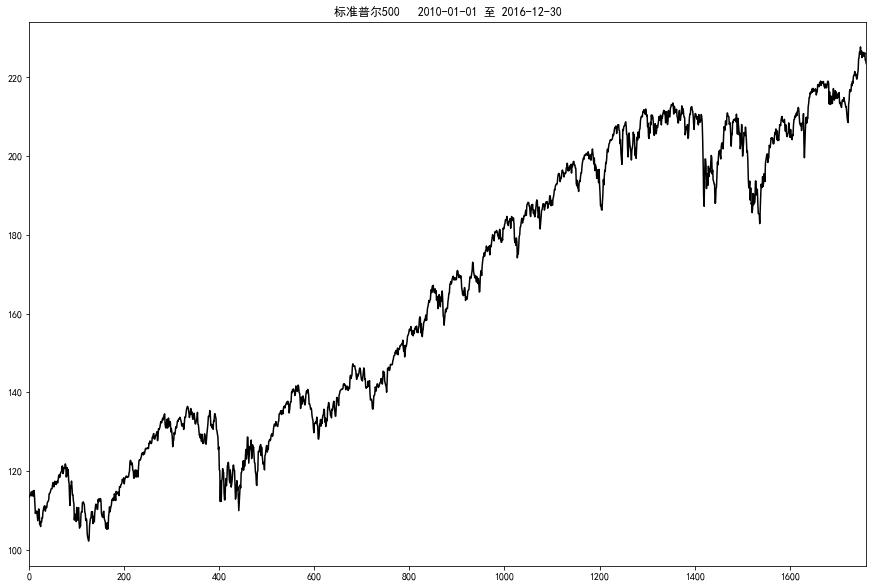

In [14]:
fig, ax = plt.subplots(figsize = (15,10))
spy_c.plot(color = 'k')
plt.title('标准普尔500   2010-01-01 至 2016-12-30')

In [25]:
first_open = spy['Open'].iloc[0]
last_close = spy['Close'].iloc[-1]
print(first_open)
print(last_close)
print(last_close - first_open)

112.370003
223.529999
111.159996
